### HSV顏色過濾轉binary畫輪廓

http://www.csie.ntnu.edu.tw/~u91029/Image.html

https://blog.csdn.net/u014365862/article/details/77720368

https://lizonghang.github.io/2016/07/25/%E8%BD%AE%E5%BB%93%E6%A3%80%E6%B5%8B/

In [1]:
import  cv2
import numpy as np
import matplotlib.pyplot as plt

def findcontours(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    h, w, _ = img.shape
    #frame=frame.copy()

    hsv=cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
    lower_red = np.array([4, 60, 0])  #5, 90, 70
    upper_red = np.array([8, 150, 255]) #9, 160, 255
    mask1=cv2.inRange(hsv,lower_red,upper_red)

#     lower_red2 = np.array([5, 70, 30])  #5, 90, 70
#     upper_red2 = np.array([13, 110, 70]) #9, 160, 255
#     mask2=cv2.inRange(hsv,lower_red2,upper_red2)

#     mask=mask1+mask2
    mask=mask1
    binary=cv2.threshold(mask,127,255,cv2.THRESH_BINARY)[1]
    #binary=cv2.dilate(binary,None,iterations=1)   
    binary=cv2.dilate(binary,None,iterations=2)
    binary=cv2.erode(binary,None,iterations=2)
    cnts, hiera = cv2.findContours(binary.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

    # print(type(cnts))
    # print(type(cnts[0]))
    # print(len(cnts))
    # print(cnts)
    # print(type(hiera))
    # print(hiera.ndim)
    # print(hiera[0].ndim)
    # print(hiera.shape)
    
    contours_area,filter_contours=[],[]
    for i in range(len(cnts)):
        cc = cnts[i]
        area = cv2.contourArea(cc)
        if(area>h/15*w/15):
            filter_contours.append(cc)
            contours_area.append(area)
            #print(area)
            
    contours_area=sorted(contours_area)          
    print(contours_area)
            
    xx=cv2.drawContours(img, filter_contours, -1, (255,0,0), 1)

#     cv2.imshow('mask',mask)
#     cv2.imshow('binary',binary)
#     cv2.imshow('contours',img)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()
    plt.figure(figsize=(10,10))
    plt.axis('off')
    plt.imshow(xx)
    plt.figure(figsize=(10,10))
    plt.axis('off')
    plt.imshow(mask)
    plt.figure(figsize=(10,10))
    plt.axis('off')
    plt.imshow(binary)
    

[5102.0, 6153.5, 22677.0, 23543.5, 32836.0, 262290.0]


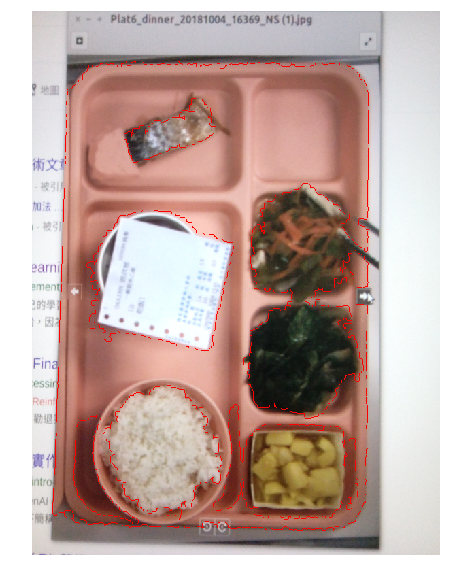

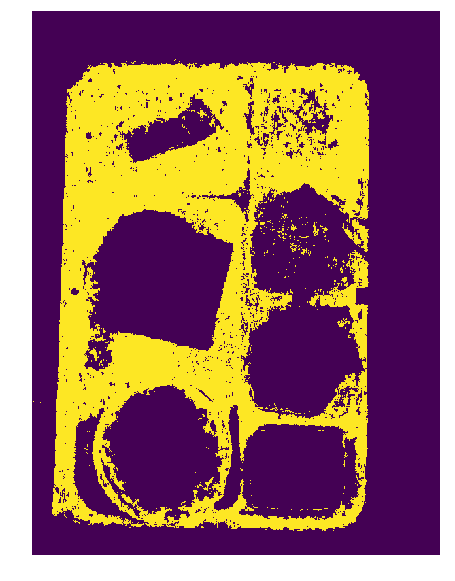

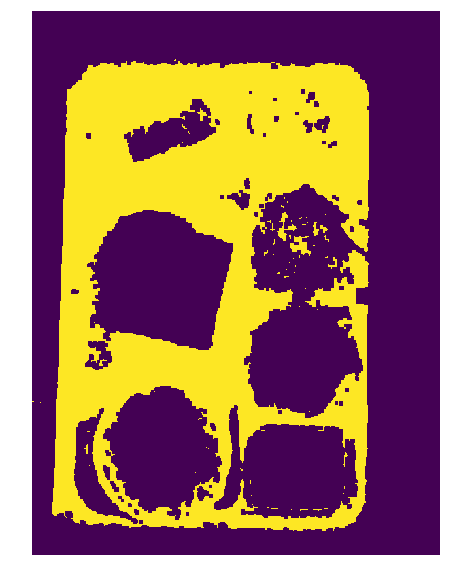

In [34]:
img_path='/dataDisk/myfloder/jupyter/server/img/20190722141803'
#img_path="/dataDisk/myfloder/jupyter/img/Plat6_dinner_20181004_16369_NS.jpg"
findcontours(img_path)

### 畫輪廓函式

In [6]:
import  cv2
import numpy as np
import matplotlib.pyplot as plt

def findcontours(img):
    h, w, _ = img.shape
    #frame=frame.copy()
    hsv=cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
    #hsv=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    lower_red = np.array([5, 80, 40])  #5, 90, 70
    upper_red = np.array([9, 160, 255]) #9, 160, 255
    mask1=cv2.inRange(hsv,lower_red,upper_red)

    lower_red2 = np.array([5, 70, 30])  #5, 90, 70
    upper_red2 = np.array([13, 110, 70]) #9, 160, 255
    mask2=cv2.inRange(hsv,lower_red2,upper_red2)

    mask=mask1+mask2

    binary=cv2.threshold(mask,127,255,cv2.THRESH_BINARY)[1]
    binary=cv2.erode(binary,None,iterations=2)
    binary=cv2.dilate(binary,None,iterations=2)
    cnts, hiera = cv2.findContours(binary.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

    # print(type(cnts))
    # print(type(cnts[0]))
    # print(len(cnts))
    # print(cnts)
    # print(type(hiera))
    # print(hiera.ndim)
    # print(hiera[0].ndim)
    # print(hiera.shape)
    thr1=h*w/100
    contours_area,filter_contours=[],[]
    for i in range(len(cnts)):
        cc = cnts[i]
        area = cv2.contourArea(cc)
        if(area>thr1):
          #  c_min=[]
          #  c_min.append(cc)
            filter_contours.append(cc)
            contours_area.append(area)
          #  print('contours area: {}'.format(area))   
        
    contours_area=sorted(contours_area)  
  
    # 1 contours 外圍區塊
    # 2 contours 外框+食物 , 2個外圍區塊
    # 3 coutours 外框+食物+內部區塊 , 3個以上外圍區塊
    
#     thr2=sum(contours_area)    
#     if len(contours_area)==1:
#         foodarea=h*w-contours_area[0]
#     elif len(contours_area)==2 and thr2>h*w:
#         foodarea=contours_area[-2]
#     elif len(contours_area)>2 and thr2>h*w:
#         foodarea=contours_area[-2]-sum(contours_area[0:-2])    
#     else:
#         foodarea=h*w-thr2
    thr2=sum(contours_area)

    if thr2>h*w:
        foodarea=contours_area[-2]
    else:
        foodarea=h*w-sum(contours_area)
        
    print('contours area: {}'.format(contours_area))
    print('food area: {}'.format(foodarea)) 
    
    xx = cv2.drawContours(img, filter_contours, -1, (255,0,0), 1)
#     xx = cv2.cvtColor(xx,cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(5, 5))
    plt.axis('off')
    plt.imshow(xx)
    plt.show()
#     cv2.imshow('contours',xx)
#     cv2.waitKey(0)
    return foodarea

contours area: [9380.5]
food area: 22619.5


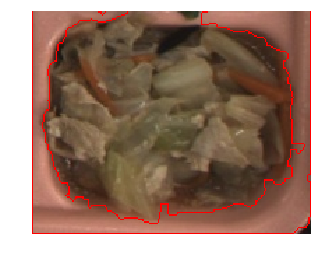

22619.5

In [7]:
img_path="/dataDisk/myfloder/inputdata/餐盤全盤/1009-2/Plat6_lunch_20181009_25454_NS.jpg"
#img_path='/dataDisk/myfloder/jupyter/img/Plat6_dinner_20181002_14613_NS.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
#box=[20,100,230,300]
#box=[180,300,380,530]
#box=[370,300,570,520]
box=[560,300,720,500]
cropimg = img[box[0]:box[2],box[1]:box[3]]   
# plt.figure(figsize=(15, 15))
# plt.axis('off')
# plt.imshow(cropimg)
# plt.show()
findcontours(cropimg)

####  retinanet box [x1,y1,x2,y2]

In [ ]:
img_path="/dataDisk/myfloder/inputdata/pascal/餐盤全盤/1009-2/save_plates/Plat6_lunch_20181009_22857_NS.jpg"
#img_path='/dataDisk/myfloder/jupyter/img/Plat6_dinner_20181002_14613_NS.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# x1,y1左上 ,x2,y2右下   
box=[310, 372, 492, 552]

# 注意取座標順序 y在前 x在後
# https://blog.csdn.net/eric_pycv/article/details/72637086
cropimg = img[box[1]:box[3],box[0]:box[2]]   
# plt.figure(figsize=(15, 15))
# plt.axis('off')
# plt.imshow(cropimg)
# plt.show()
findcontours(cropimg)

### no apply

In [ ]:
    # 1 contours 外圍區塊
    # 2 contours 外框+食物 , 2個外圍區塊
    # 3 coutours 外框+食物+內部區塊 , 3個以上外圍區塊
    
#     thr2=sum(contours_area)    
#     if len(contours_area)==1:
#         foodarea=h*w-contours_area[0]
#     elif len(contours_area)==2 and thr2>h*w:
#         foodarea=contours_area[-2]
#     elif len(contours_area)>2 and thr2>h*w:
#         foodarea=contours_area[-2]-sum(contours_area[0:-2])    
#     else:
#         foodarea=h*w-thr2
    thr2=sum(contours_area[-2:])

    if thr2>h*w:
        foodarea=contours_area[-2]
    elif thr2>h*w and sum(contours_area[0:-2])>contours_area[-2]:
        foodarea=sum(contours_area[0:-1])
    elif len(sum(contours_area[0:-2])>contours_area[-2]:    
        foodarea=sum(contours_area)
    else:
        foodarea=h*w-sum(contours_area)

In [ ]:
import  cv2
import numpy as np

img_path="/dataDisk/myfloder/jupyter/img/Plat6_dinner_20181001_21258_NS.jpg"
img = cv2.imread(img_path)
#frame=frame.copy()

hsv=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
lower_red = np.array([10, 37, 43])
upper_red = np.array([17, 255, 255])
mask=cv2.inRange(hsv,lower_red,upper_red)

binary=cv2.threshold(mask,127,255,cv2.THRESH_BINARY)[1]
binary=cv2.dilate(binary,None,iterations=2)
cnts, hiera = cv2.findContours(binary.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

print(type(cnts))
print(type(cnts[0]))
print(len(cnts))

print(type(hiera))
print(hiera.ndim)
print(hiera[0].ndim)
print(hiera.shape)

cv2.drawContours(img, cnts, -1, (0,0,255), 1)

# cv2.imshow('mask',mask)
# cv2.imshow('binary',binary)
# cv2.imshow("img",frame)
cv2.imshow('contours',img)
cv2.waitKey(0)

In [ ]:
img_path="/dataDisk/myfloder/jupyter/img/Plat6_dinner_20181001_21258_NS.jpg"

In [ ]:
# 圖片rgb顏色處理
# http://www.csie.ntnu.edu.tw/~u91029/Image.html
from PIL import Image
img = Image.open(img_path)
width, height = img.size
 
for y in range(height):
    for x in range(width):
        rgba = img.getpixel((x,y))
        rgba = (255 - rgba[0],  # R
                255 - rgba[1],  # G
                255 - rgba[2],  # B
               )
                #rgba[3]); # A
        img.putpixel((x,y), rgba)
 
img.show()
#img.save("new.png")

In [ ]:
# 彩图R、G、B的提取
# https://blog.csdn.net/jnulzl/article/details/47133479
import numpy as np
import cv2

image = cv2.imread(img_path)
cv2.imshow("Original",image)
cv2.waitKey(0)

#R、G、B分量的提取
(B,G,R) = cv2.split(image)#提取R、G、B分量
cv2.imshow("Red",R)
cv2.imshow("Green",G)
cv2.imshow("Blue",B)
cv2.waitKey(0)


In [ ]:
# 圖片區域擷取
# https://blog.csdn.net/little_bobo/article/details/79061257
import os
import cv2
image=cv2.imread(img_path)
print(image.shape)
cropImg = image[0:400,450:530]
cv2.imshow('cropImg',cropImg)
cv2.waitKey(0)

### end